In [ ]:
Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv")


In [31]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [32]:
df.drop(columns=['User ID','Gender'],inplace = True)

In [33]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


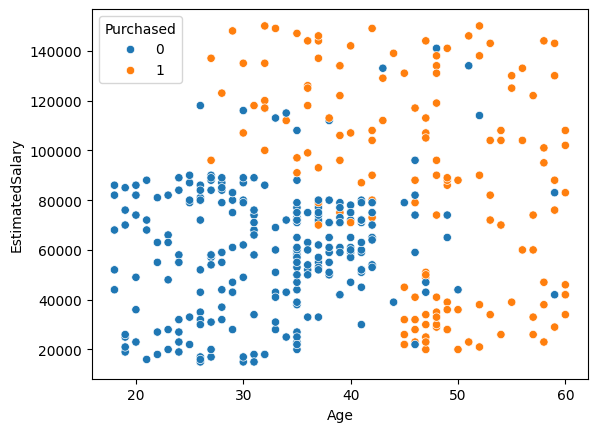

In [28]:
sns.scatterplot(x= 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased')
plt.show()

In [9]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
dt1 = DecisionTreeClassifier(criterion = 'entropy')
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
dt.score(x_test, y_test)*100

91.25

In [50]:
dt.score(x_train, y_train)*100

91.875

In [51]:
dt1.score(x_test, y_test)*100

83.75

In [20]:
dt.predict([[35,20000]])	

C:\Users\Ali Shah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Ali Shah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


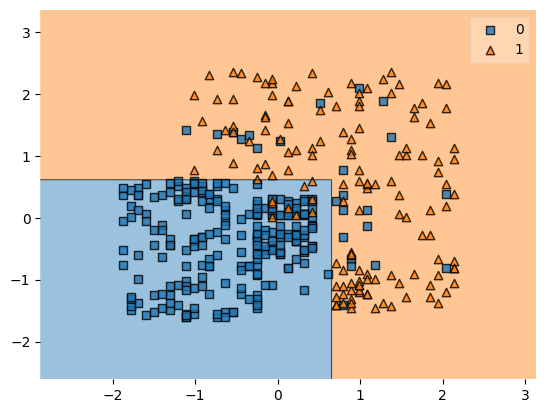

In [52]:
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf = dt)
plt.show()

In [21]:
from sklearn.tree import plot_tree

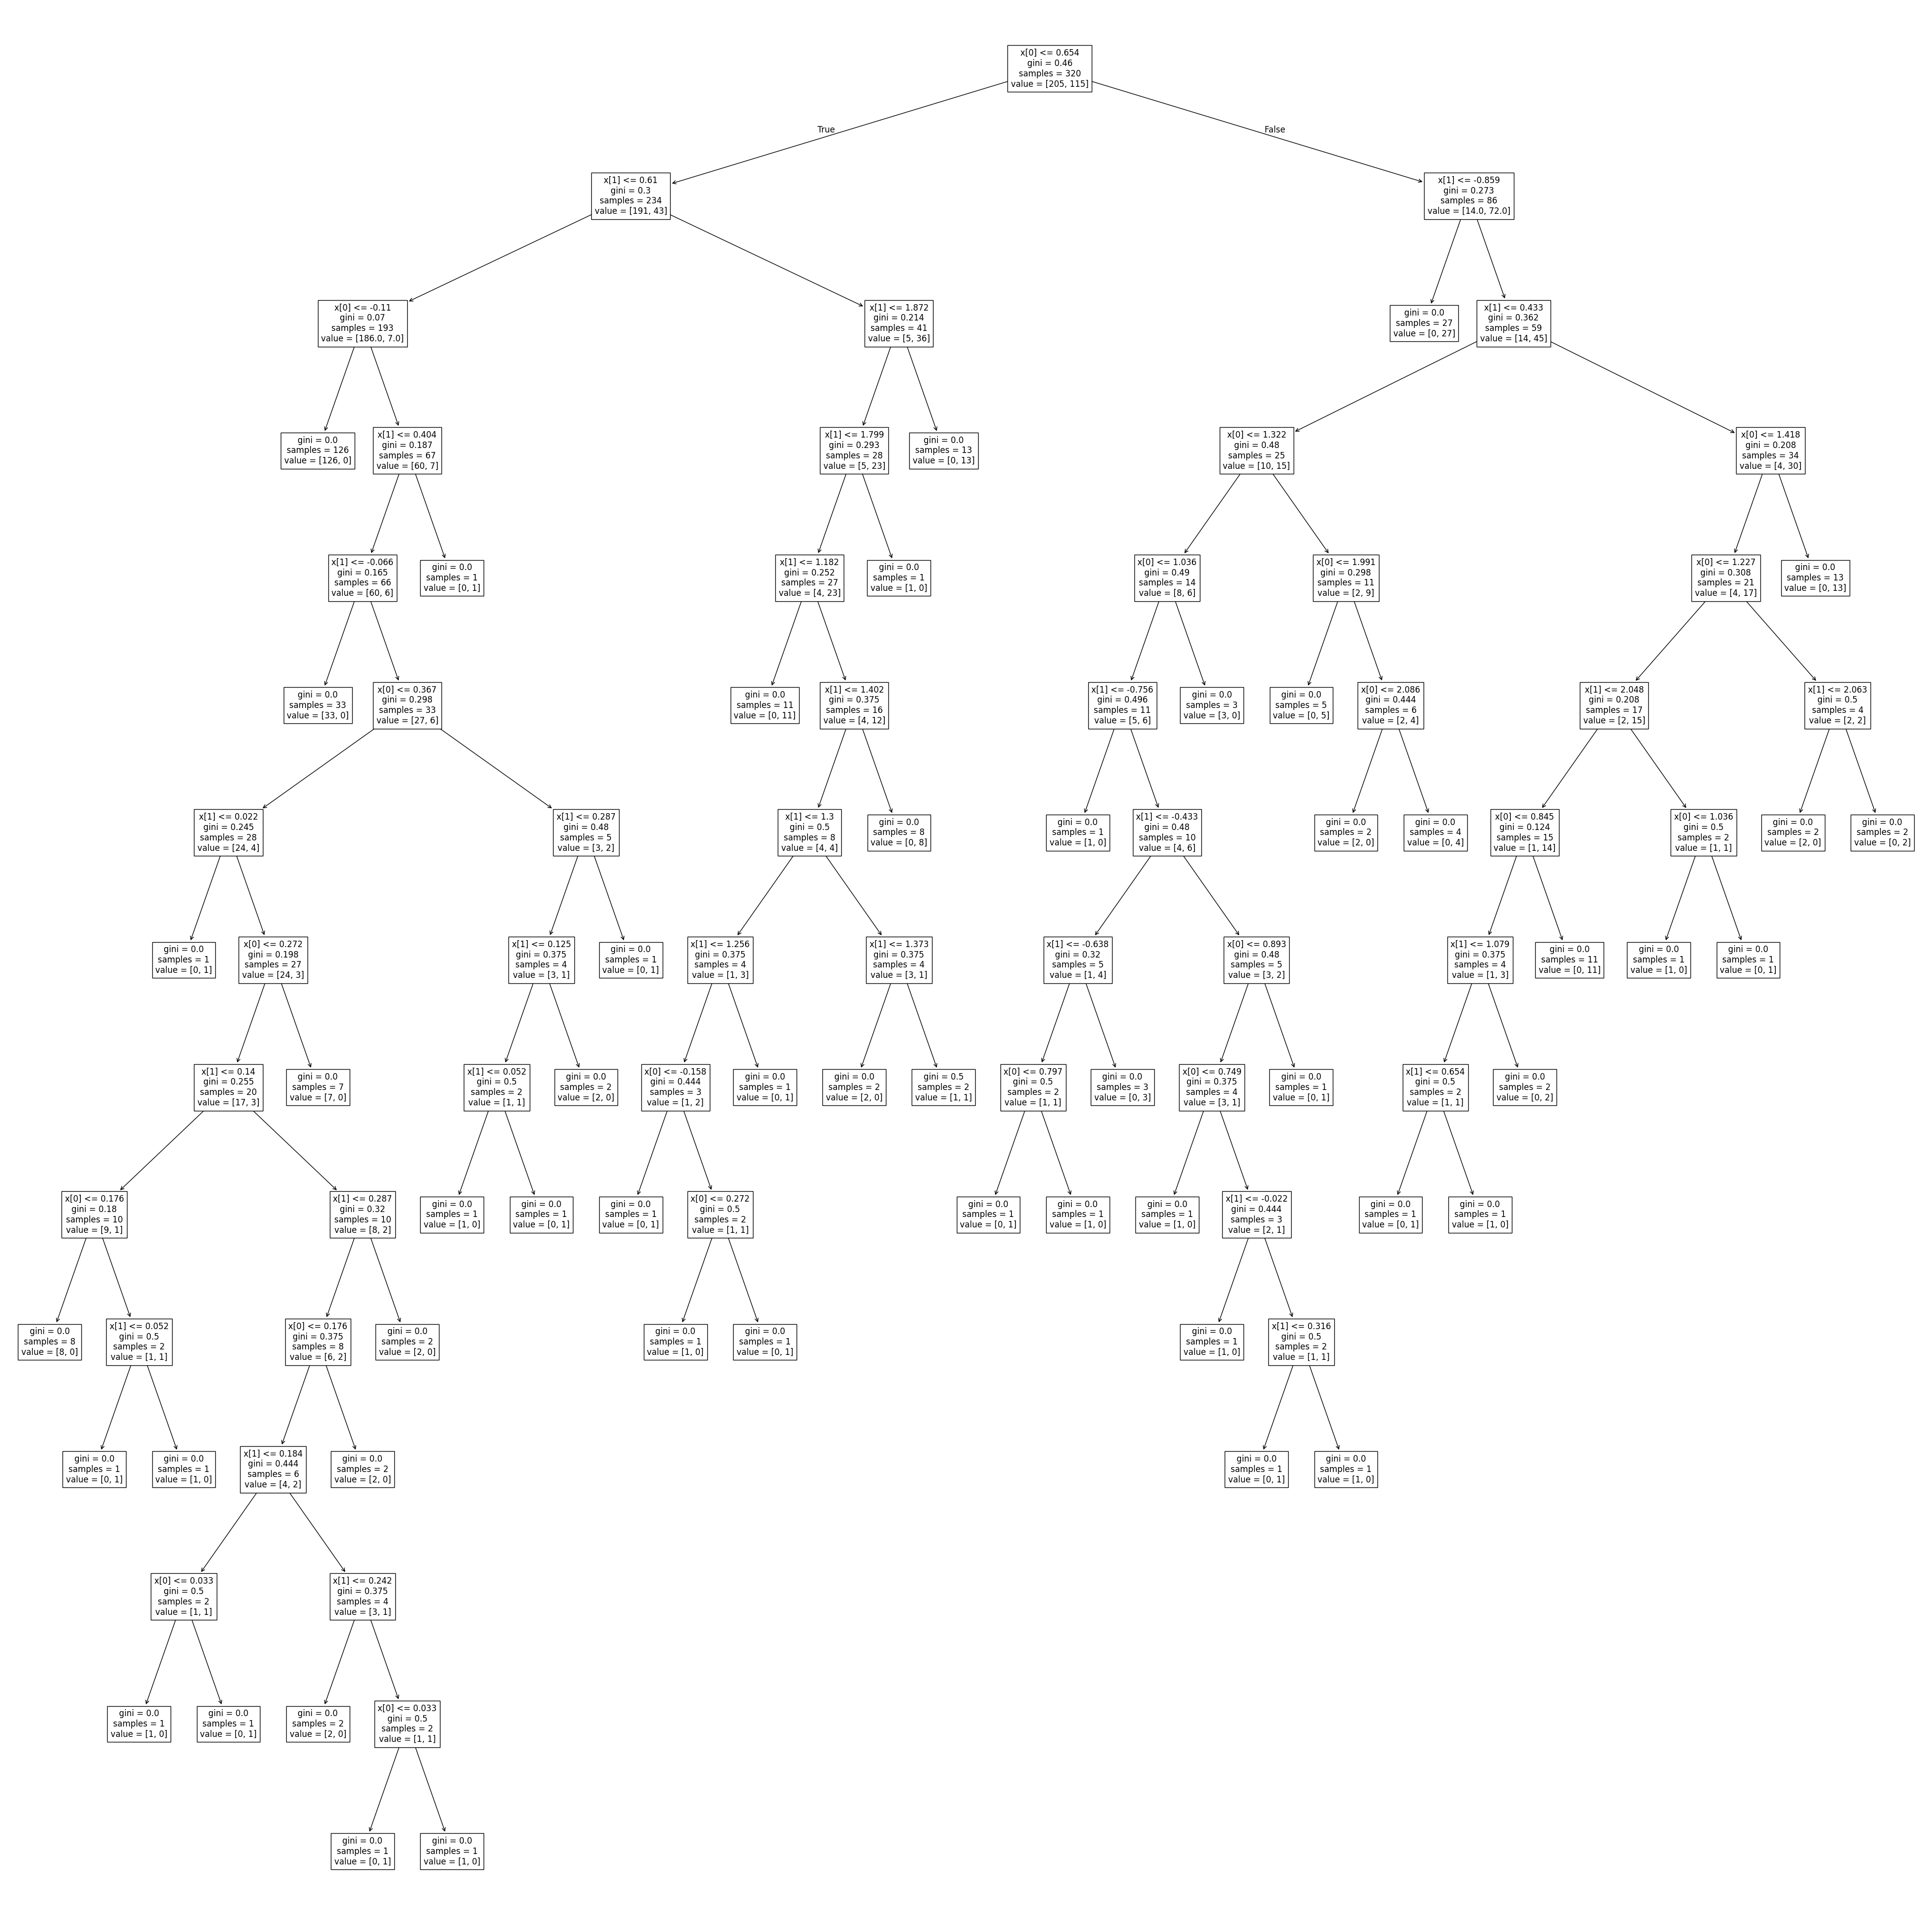

In [25]:
plt.figure(figsize = (50,50))
plot_tree(dt)
plt.savefig('demo.jpg')
plt.show()

In [ ]:
Pre and Post Pruning

In [47]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth =i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train, y_train), dt2.score(x_test, y_test), i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [ ]:
Decision Tree (Regression)

In [53]:
df1 = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv")
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
K-Nearest Neighbours(Classification)

In [54]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


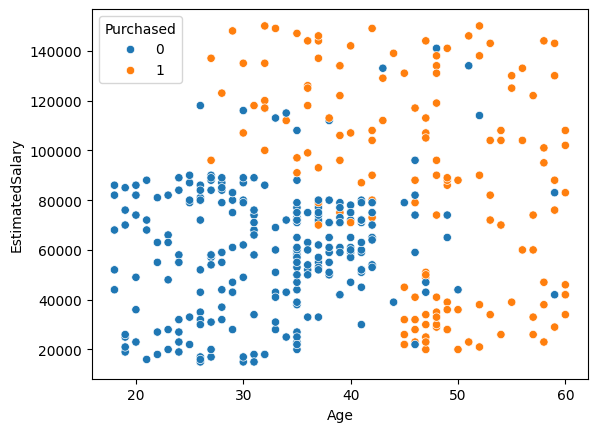

In [56]:
sns.scatterplot(x= 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased')
plt.show()

In [55]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
Knn = KNeighborsClassifier(n_neighbors=7)
Knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
Knn.score(x_test, y_test)*100

93.75

In [67]:
Knn.score(x_train, y_train)*100

91.875

In [70]:
knn1.predict([[19,19000]])

C:\Users\Ali Shah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [68]:
for i in range(1,20):
    knn1 = KNeighborsClassifier(n_neighbors =i)
    knn1.fit(x_train, y_train)
    print(i,knn1.score(x_train, y_train), knn1.score(x_test, y_test)*100)

1 0.996875 85.0
2 0.915625 86.25
3 0.925 91.25
4 0.91875 92.5
5 0.909375 92.5
6 0.909375 90.0
7 0.91875 93.75
8 0.90625 92.5
9 0.9125 93.75
10 0.90625 92.5
11 0.909375 92.5
12 0.9125 92.5
13 0.915625 92.5
14 0.90625 92.5
15 0.90625 92.5
16 0.9 92.5
17 0.90625 92.5
18 0.9 92.5
19 0.909375 92.5


In [ ]:
K-Nearest Neighbours(Regression)

In [2]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Pranjali1049/Salary_Prediction/refs/heads/main/Salary_Data.csv")
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df2.drop(columns=['Gender','Education Level','Job Title'], inplace = True)

In [4]:
df2.head(3)

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0


In [13]:
x = df2.drop(columns='Salary')
y = df2['Salary']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Support Vector Machines(SVM)-Classification

In [2]:
df3 = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Placement.csv")
df3

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [4]:
df3.drop(columns=['Student_ID'], inplace = True)

In [5]:
df3.head(3)

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


In [7]:
x = df3.iloc[:,:-1]
y = df3['Placement']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 15)


In [ ]:
Support Vector Machines(SVM) - Regression

In [ ]:
C:\Users\Ali Shah\Desktop

In [ ]:
HyperParameter Tuning, Moel Parameter

In [20]:
df4 = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Salary%20Data.csv")
df4.head(3)


,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205


In [18]:
x = df4.iloc[:,:-1]
y = df4['Salary']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 15)


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=10)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [37]:
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(99.76721811534645, 93.75317449706941)

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
df4 = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
      'splitter' : ['best','random'],
      'max_depth' : [ i for i in range(2,20)]}

In [39]:
rd = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions = df4,n_iter =20)
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [40]:
rd.best_params_

{'splitter': 'random', 'max_depth': 19, 'criterion': 'squared_error'}

In [42]:
rd.best_score_

np.float64(0.7744244903600371)

In [33]:
gd = GridSearchCV(DecisionTreeRegressor(),param_grid=df4)
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [34]:
gd.best_params_

{'criterion': 'absolute_error', 'max_depth': 10, 'splitter': 'random'}

In [38]:
gd.best_score_

np.float64(0.8169701235742777)

In [ ]:
Cross Validation